<a href="https://colab.research.google.com/github/eliasvite/analisis-datos-poblacion/blob/main/analisis_matrimonios_divorcios_mexico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

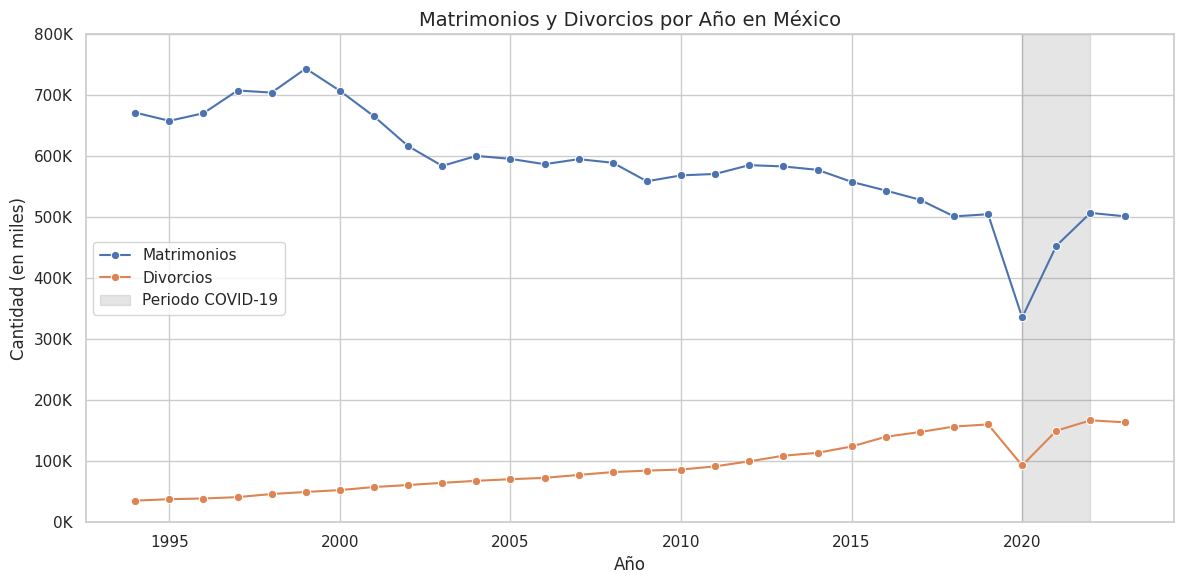

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Cargar datos
df = pd.read_csv('mat_div_mexico.csv', encoding='latin1')

# Asegurar que 'Periodo' sea numérico and ordenar por año
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')
df = df.sort_values('Año')

# Convert 'Matrimonios' and 'Divorcios' to numeric, coercing errors
df['Matrimonios'] = pd.to_numeric(df['Matrimonios'], errors='coerce')
df['Divorcios'] = pd.to_numeric(df['Divorcios'], errors='coerce')

# Estilo visual
sns.set(style='whitegrid')

# Crear la figura
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Año', y='Matrimonios', label='Matrimonios', marker='o')
sns.lineplot(data=df, x='Año', y='Divorcios', label='Divorcios', marker='o')

# Marcar periodo del COVID-19 (2020 a 2022)
plt.axvspan(2020, 2022, color='gray', alpha=0.2, label='Periodo COVID-19')

# Títulos y etiquetas
plt.title('Matrimonios y Divorcios por Año en México', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Cantidad (en miles)', fontsize=12)

# Eje Y: formatear a miles (K)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e3:,.0f}K'))

# Calcular el rango dinámico y usar 4–6 divisiones como guía
min_y = df[['Matrimonios', 'Divorcios']].min().min()
max_y = df[['Matrimonios', 'Divorcios']].max().max()

# Elegir un múltiplo conveniente, como 250,000
step = 100_000
start = (min_y // step) * step
end = ((max_y // step) + 1) * step

# Establecer los ticks en el rango deseado
plt.yticks(range(int(start), int(end) + step, step))

# Leyenda y ajustes finales
plt.legend()
plt.tight_layout()
plt.show()